In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import geopandas as gpd

ModuleNotFoundError: No module named 'geopandas'

In [7]:
df=pd.read_csv("forrest.csv")

In [8]:
df.head()

,iso3c,forests_2000,forests_2020,trend
0,AFG,1.9,1.9,0.0
1,ALB,28.1,28.8,2.5
2,DZA,0.7,0.8,14.3
3,ASM,88.7,85.7,-3.4
4,AND,34.0,34.0,0.0


In [9]:
df.dtypes

iso3c            object
forests_2000    float64
forests_2020    float64
trend           float64
dtype: object

In [10]:
df.isnull().sum()

iso3c            0
forests_2000     0
forests_2020     0
trend           10
dtype: int64

In [11]:
#Handle missing values

for column in df.columns:
    if df[column].dtype != 'object':
        df[column] = df[column].fillna(df[column].mean())

In [12]:
df.dtypes

iso3c            object
forests_2000    float64
forests_2020    float64
trend           float64
dtype: object

In [13]:
#Check for missing again
df.isnull().sum()

iso3c           0
forests_2000    0
forests_2020    0
trend           0
dtype: int64

In [14]:
df.describe()

,forests_2000,forests_2020,trend
count,237.000000,237.000000,237.000000
mean,32.255274,31.585654,0.104846
std,25.366225,24.744673,16.502283
min,0.000000,0.000000,-100.000000
25%,9.900000,10.400000,-5.000000
50%,30.300000,30.300000,0.000000
75%,50.900000,49.800000,3.700000
max,98.300000,97.400000,86.200000


In [16]:
plt.figure(figsize=(12,6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

Text(0, 0.5, 'Frequency')

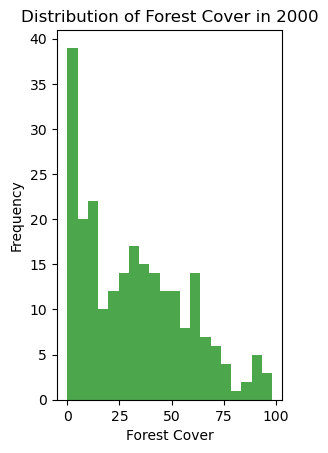

In [22]:
plt.subplot(1,2,1)
plt.hist(df['forests_2000'],bins=20, color='green', alpha=0.7)
plt.title('Distribution of Forest Cover in 2000')
plt.xlabel('Forest Cover')
plt.ylabel('Frequency')

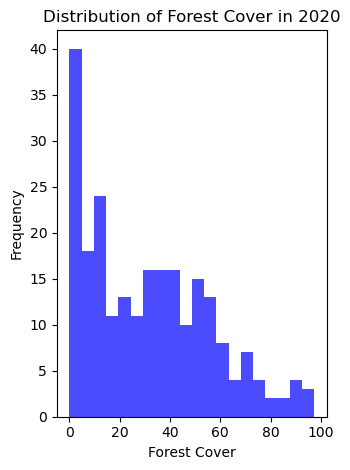

In [23]:
plt.subplot(1,2,2)
plt.hist(df['forests_2020'], bins=20, color='blue' , alpha = 0.7)
plt.title('Distribution of Forest Cover in 2020')
plt.xlabel('Forest Cover')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

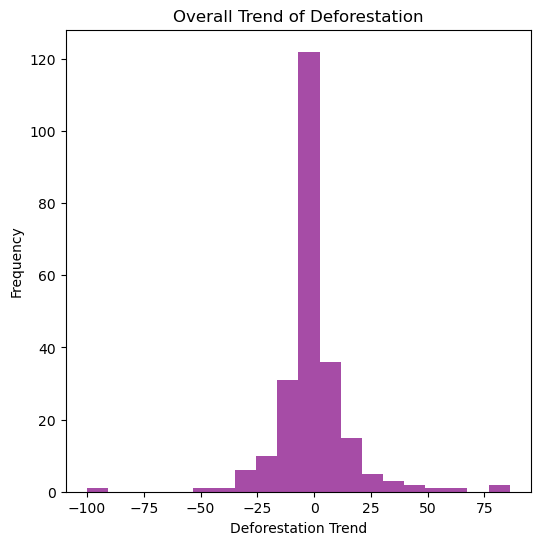

In [31]:
plt.figure(figsize=(6,6))
plt.hist(df['trend'], bins=20, color='purple' , alpha=0.7)
plt.title('Overall Trend of Deforestation')
plt.xlabel('Deforestation Trend')
plt.ylabel('Frequency')
plt.show()

# Country-wise Analysis


In [33]:
#calculate the change in forest cover
df['forests_change']= df['forests_2020'] - df['forests_2000']

In [34]:
df.head()

,iso3c,forests_2000,forests_2020,trend,forests_change
0,AFG,1.9,1.9,0.0,0.0
1,ALB,28.1,28.8,2.5,0.7
2,DZA,0.7,0.8,14.3,0.1
3,ASM,88.7,85.7,-3.4,-3.0
4,AND,34.0,34.0,0.0,0.0


In [35]:
df_sorted = df.sort_values(by='forests_change', ascending = True)

In [36]:
df_sorted.head(10)

,iso3c,forests_2000,forests_2020,trend,forests_change
161,PRY,57.9,40.5,-30.1,-17.4
148,NIC,44.9,28.3,-37.0,-16.6
154,MNP,69.5,53.0,-23.7,-16.5
35,KHM,61.1,45.7,-25.2,-15.4
76,GMB,35.3,24.0,-32.0,-11.3
141,MMR,53.4,43.7,-18.2,-9.7
223,TZA,60.6,51.6,-14.9,-9.0
21,BEN,36.7,27.8,-24.3,-8.9
123,MWI,32.7,23.8,-27.2,-8.9
5,AGO,62.3,53.4,-14.3,-8.9


# Data Visualization

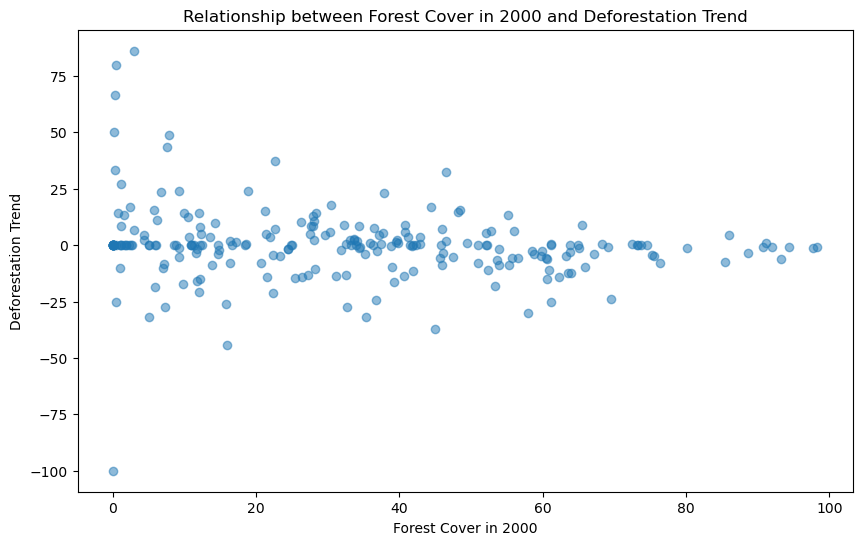

In [37]:
#Create a scatter plot
plt.figure(figsize=(10,6))
plt.scatter(df['forests_2000'], df['trend'], alpha = 0.5)
plt.title('Relationship between Forest Cover in 2000 and Deforestation Trend')
plt.xlabel('Forest Cover in 2000')
plt.ylabel('Deforestation Trend')
plt.show()

# Logistics Regression 

In [46]:
df.shape

(237, 241)

In [49]:
df.head()

,forests_2000,forests_2020,trend,forests_change,iso3c_ABW,iso3c_AFG,iso3c_AGO,iso3c_AIA,iso3c_ALB,iso3c_AND,...,iso3c_VIR,iso3c_VNM,iso3c_VUT,iso3c_WLD,iso3c_WLF,iso3c_WSM,iso3c_YEM,iso3c_ZAF,iso3c_ZMB,iso3c_ZWE
0,1.9,1.9,0.0,0.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,28.1,28.8,2.5,0.7,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0.7,0.8,14.3,0.1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,88.7,85.7,-3.4,-3.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,34.0,34.0,0.0,0.0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [53]:
df['forests_change'].value_counts()

 0.0     55
-3.0      5
 0.8      4
-0.7      3
 1.4      3
         ..
-0.3      1
-11.3     1
 2.4      1
-1.1      1
-2.4      1
Name: forests_change, Length: 150, dtype: int64

In [54]:
df = pd.get_dummies(df)

In [56]:
df.fillna(0,inplace = True)

In [57]:
df.shape

(237, 241)

In [58]:
train = df[0:120]
test = df[121:]

In [60]:
x_train = train.drop('forests_change', axis= 1)

In [61]:
y_train = train['forests_change']

In [62]:
true_p = test['forests_change']

In [66]:
from sklearn.linear_model import LinearRegression

In [67]:
logreg = LinearRegression()

In [68]:
logreg.fit(x_train,y_train)

LinearRegression()

In [70]:
x_test = test.drop('forests_change',axis=1)

In [71]:
x_test = pd.get_dummies(x_train)

In [72]:
x_test.shape

(120, 240)

In [73]:
x_train.fillna(0,inplace = True)

In [74]:
x_test.fillna(0,inplace = True)

In [76]:
pred = logreg.predict(x_test)

In [77]:
pred

array([-3.01980663e-14,  7.00000000e-01,  1.00000000e-01, -3.00000000e+00,
       -7.81041898e-14, -8.90000000e+00, -5.12090370e-14, -3.00000000e+00,
       -1.80000000e+00, -2.00000000e-01, -3.33622019e-14,  2.00000000e-01,
        8.00000000e-01,  1.70000000e+00, -3.76816633e-14,  4.00000000e-01,
       -3.00000000e-01, -2.86350804e-14,  2.40000000e+00,  8.00000000e-01,
       -8.00000000e+00, -8.90000000e+00, -3.95065924e-14,  5.90000000e+00,
       -4.00000000e+00, -3.88166062e-14,  1.50000000e+00, -4.20000000e+00,
       -6.50000000e+00, -4.00000000e-01, -3.20000000e+00,  5.40000000e+00,
       -3.70000000e+00,  3.30000000e+00,  1.40000000e+00, -1.54000000e+01,
       -2.70000000e+00, -1.00000000e-01, -9.00000000e-01, -1.00000000e+00,
       -1.60000000e+00,  3.20000000e+00,  4.50000000e+00, -3.20000000e+00,
       -4.70000000e+00, -7.00000000e-01,  1.00000000e-01,  3.40000000e+00,
       -7.10000000e+00,  9.00000000e-01,  8.50000000e+00,  5.62065585e-13,
        1.00000000e-01,  

In [80]:
logreg.score(x_train,y_train)

1.0

rmse_test=np.sqrt(np.power((np.array(true_p) - np.array(pred),2)))

(array([ 1.,  1.,  2.,  8., 11., 11., 60., 18.,  4.,  4.]),
 array([-15.4 , -13.01, -10.62,  -8.23,  -5.84,  -3.45,  -1.06,   1.33,
          3.72,   6.11,   8.5 ]),
 <BarContainer object of 10 artists>)

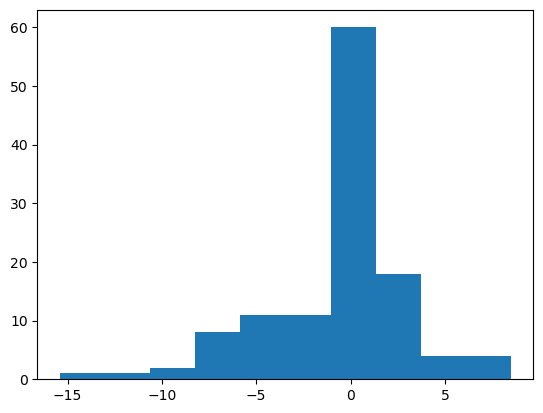

In [82]:
plt.hist(pred)